In [6]:
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data = pd.read_csv('FuelConsumption.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
dataMinimize = data[['FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]
dataMinimize.head()

,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,8.5,33
1,9.6,29
2,5.9,48
3,11.1,25
4,10.6,27


In [14]:
msk = np.random.rand(len(dataMinimize)) < 0.8
train= dataMinimize[msk]
test = dataMinimize[~msk]

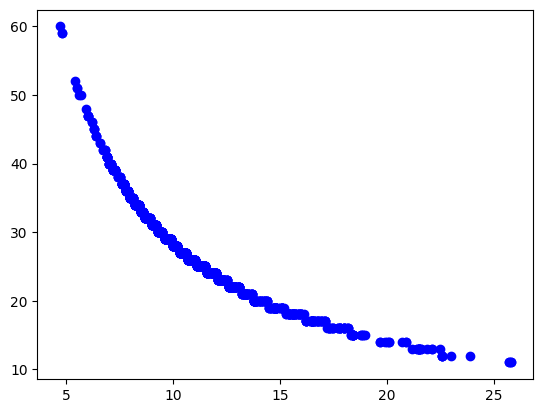

In [18]:
plt.scatter(dataMinimize.FUELCONSUMPTION_COMB, dataMinimize.FUELCONSUMPTION_COMB_MPG, color = 'blue')
plt.show()

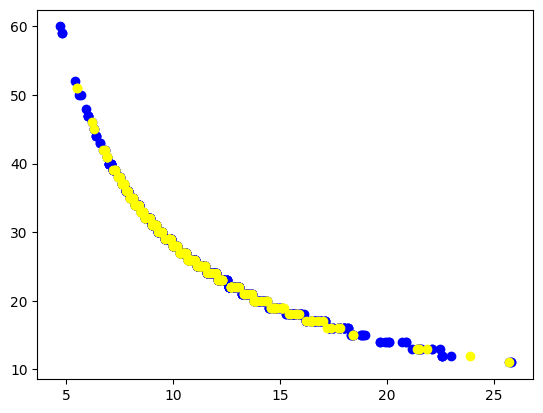

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train.FUELCONSUMPTION_COMB, train.FUELCONSUMPTION_COMB_MPG, color = 'blue')
ax1.scatter(test.FUELCONSUMPTION_COMB, test.FUELCONSUMPTION_COMB_MPG , color = 'yellow')
plt.show()

In [20]:
linerReg = linear_model.LinearRegression()
x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']])
regr = linerReg.fit(x,y)
print(regr.coef_)
print(regr.intercept_)

[[-1.98071554]]
[49.34390704]


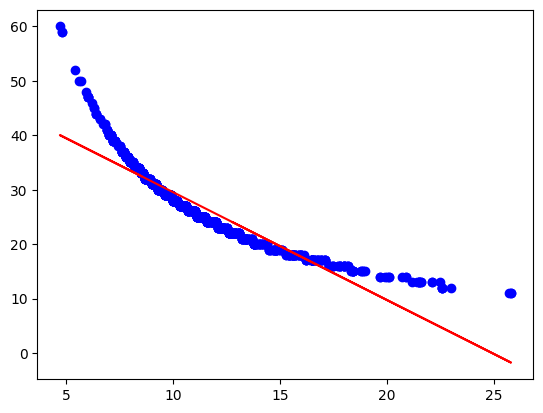

In [28]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.FUELCONSUMPTION_COMB_MPG, color = 'blue')
plt.plot( x, x*regr.coef_[0][0] + regr.intercept_[0], '-r')
plt.show()

In [32]:
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG']])
test_y_ = regr.predict(test_x)

print('MSE: ', np.mean((test_y - test_y_)**2))
print('r2: ', r2_score(test_y ,test_y_))

MSE:  7.7509492043676005
r2:  0.8660028861639453


### Poly

In [36]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']])

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG']])

poly = PolynomialFeatures(degree=2)

train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[  1.  ,   8.5 ,  72.25],
       [  1.  ,   5.9 ,  34.81],
       [  1.  ,  11.1 , 123.21],
       ...,
       [  1.  ,  11.8 , 139.24],
       [  1.  ,  11.3 , 127.69],
       [  1.  ,  12.8 , 163.84]])

In [38]:
clf = linear_model.LinearRegression()
polyReg = clf.fit(train_x_poly,train_y)
print(polyReg.coef_, polyReg.intercept_)

[[ 0.         -5.79835338  0.14258236]] [72.74884757]


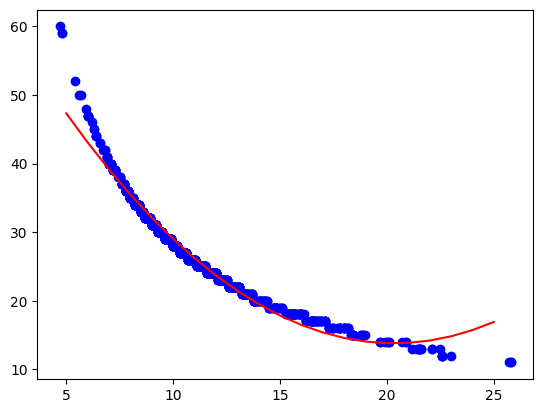

In [41]:
XX = np.arange(5,26)
YY = polyReg.intercept_[0]+ polyReg.coef_[0][1]*XX+ polyReg.coef_[0][2]*np.power(XX, 2)
plt.scatter(train.FUELCONSUMPTION_COMB, train.FUELCONSUMPTION_COMB_MPG , color = 'blue')
plt.plot(XX, YY , '-r')

In [46]:
test_x_poly = poly.fit_transform(test_x)
test_y_ = polyReg.predict(test_x_poly)

print('MSE: ', np.mean((test_y_ - test_y)**2))
print('r2: ' , r2_score(test_y_,test_y))

MSE:  1.3521263625365374
r2:  0.975884332148184


In [47]:
poly = PolynomialFeatures(degree=3)

train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.000000e+00, 8.500000e+00, 7.225000e+01, 6.141250e+02],
       [1.000000e+00, 5.900000e+00, 3.481000e+01, 2.053790e+02],
       [1.000000e+00, 1.110000e+01, 1.232100e+02, 1.367631e+03],
       ...,
       [1.000000e+00, 1.180000e+01, 1.392400e+02, 1.643032e+03],
       [1.000000e+00, 1.130000e+01, 1.276900e+02, 1.442897e+03],
       [1.000000e+00, 1.280000e+01, 1.638400e+02, 2.097152e+03]])

[[ 0.00000000e+00 -1.18691333e+01  5.98120694e-01 -1.05930257e-02]] [97.81078945]


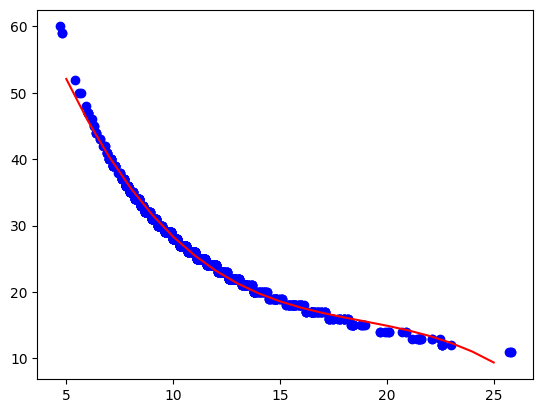

In [48]:
clf = linear_model.LinearRegression()
polyReg = clf.fit(train_x_poly,train_y)
print(polyReg.coef_, polyReg.intercept_)

XX = np.arange(5,26)
YY = polyReg.intercept_[0]+ polyReg.coef_[0][1]*XX+ polyReg.coef_[0][2]*np.power(XX, 2)+ polyReg.coef_[0][3]*np.power(XX, 3)
plt.scatter(train.FUELCONSUMPTION_COMB, train.FUELCONSUMPTION_COMB_MPG , color = 'blue')
plt.plot(XX, YY , '-r')

In [49]:
test_x_poly = poly.fit_transform(test_x)
test_y_ = polyReg.predict(test_x_poly)

print('MSE: ', np.mean((test_y_ - test_y)**2))
print('r2: ' , r2_score(test_y_,test_y))

MSE:  0.27742539522223103
r2:  0.9952755441389909
